In [12]:
from sklearn.datasets import fetch_openml

# datasets api contains some usefull apis to fetch datasets, fetch_* to get datasets from the internet, load_* to get datasets from the local machine, make_* to generate fake datasets
mnist = fetch_openml('mnist_784', as_frame=False) # as_frame=False to get numpy array, because pandas is not quite usefull because its returing an collection of values that refresent images

In [13]:
X, y = mnist.data, mnist.target
print(f"Data shape: {X.shape}")
print(f"Target shape: {y.shape}")

Data shape: (70000, 784)
Target shape: (70000,)


## Mnist Dataset 

- Dataset objects contains several variables and methods
- mnist.data and mnist.target are the respective X and y variables
- The data has 70000 records with 784 features each feature represents an single pixel convert 784 into 28 * 28 pixels to display an image 

In [14]:
mnist.data[0] # first image 0-255 pixel values(black to white)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
## prepare the test and train set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # data is already shuffled so we can just split the data

# The training set is already shuffled for us, which is good because this guarantees
# that all cross-validation folds will be similar (we don’t want one fold to be missing
# some digits). Moreover, some learning algorithms are sensitive to the order of the
# training instances, and they perform poorly if they get many similar instances in
# a row. Shuffling the dataset ensures that this won’t happen.

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [17]:
X_train[0].reshape(28, 28) # reshaping the data to 28x28 pixel image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

'5'

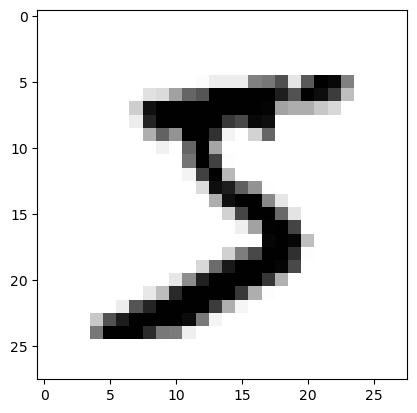

In [18]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28, 28), cmap='binary') # cmap='binary' to get black and white image

# the below images seems to be 5
y_train[0] # and its indeed 5

In [19]:
## Lets create a binary classifier to classify 5 and not 5

In [20]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [21]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

# SGD Classifier is capable of handling very large datasets efficiently, 
# this is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd.predict([X_train[0]]) # it should be True, because the image is 5

array([ True])

## Performance Measures

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring='accuracy') # 3 fold cross validation

# 95% above accuracy in all the three folds? 
# accuracy is not a good measure for classifiers, because the dataset is skewed, only 10% of the data is 5, so if we always predict not 5, we will get 90% accuracy

# lets prove it by creating a dumb classifier


array([0.95035, 0.96035, 0.9604 ])

In [24]:
from sklearn.dummy import DummyClassifier

dumb = DummyClassifier()

dumb.fit(X_train, y_train_5)

print(any(dumb.predict(X_train))) # its false, no 5 detected

False


In [25]:
cross_val_score(dumb, X_train, y_train_5, cv=3, scoring='accuracy') # 90% accuracy

# accuracy is not a good measure for classifiers because there might be more classes than other, we can use confusion matrix to get more insights

array([0.90965, 0.90965, 0.90965])

In [26]:
# lets implement custom cross validation using StratifiedKFold

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


skfolds = StratifiedKFold(n_splits=3) # 3 fold cross validation

# StratifiedKfold splits the data into n_splits, and each split contains the same ratio of classes as the original dataset

for train_index, test_index in skfolds.split(X_train, y_train_5):
    sgd_clg = clone(sgd)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]

    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    sgd_clg.fit(X_train_fold, y_train_fold)

    y_pred = sgd_clg.predict(X_test_fold)

    acc = sum(y_pred == y_test_fold) / len(X_test_fold)

    print(acc)

0.95035
0.96035
0.9604


### Confusion Matrix

- The general idea of a confusion matrix is to count the number of times instances
of class A are classified as class B, for all A/B pairs. For example, to know the
number of times the classifier confused images of 8s with 0s, you would look at
row #8, column #0 of the confusion matrix.

- we can use cross_val_predict for giving out the predictions on each set, remember to use test set before launching

## Working of cross_val_predict

Example

Let's say X_train has 15 samples, and you use cv=3.

Fold 1: Train on samples [5-15], predict for [1-4].

Fold 2: Train on samples [1-4, 11-15], predict for [5-10].

Fold 3: Train on samples [1-10], predict for [11-15].

cross_val_predict will then return a vector of 15 predictions, with each sample's predicted label determined by the model trained on the other folds.

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

y_train_pred # predictions

array([ True, False, False, ...,  True, False, False])

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred) # row is actual class, column is predicted class

# 53892 are correctly classified as non 5s(true negative), 687 are wrongly classified as 5s((false positives, also called type I errors) (row1)
# 1891 are wrongly classified as non 5s(false Negative, also called type 2 errors), 3530 are correctly classified as 5s(True Positive) (row2)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [30]:
# Confusion matrix gives a lot of information, but sometimes we need a more concise metric, like precision, recall, f1 score

# Precision = TP / (TP + FP) # precision is the accuracy of the positive predictions
# Recall = TP / (TP + FN) # recall is the ratio of positive instances that are correctly detected by the classifier

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

(precision_score(y_train_5, y_train_pred), # 0.8370879772350012
recall_score(y_train_5, y_train_pred)) # 0.6511713705958311

#When it claims an image represents a 5, it is correct only 83.7% of the
#time. Moreover, it only detects 65.1% of the 5s.


# precision is alone not enough, we need recall too, recall is the ratio of positive instances that are correctly detected by the classifier
# Example of recall is spam detection, you dont want to miss any spam, so you need a classifier with high recall
# lets say you are a doctor and you want to detect all the patients with cancer, you dont want to miss any patient, so you need a classifier with high recall(reduce the false negatives)

(0.8370879772350012, 0.6511713705958311)

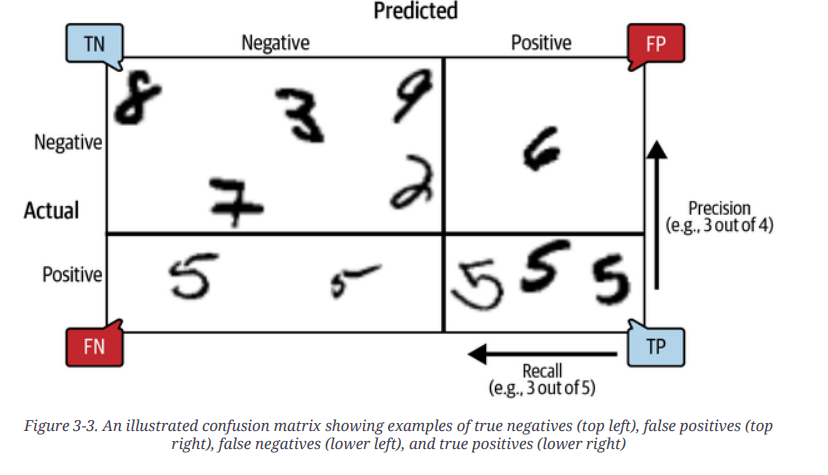

In [32]:
# its often convenient to combine precision and recall into a single metric called F1 score
# F1 score is the harmonic mean of precision and recall, it gives more weight to low values, so the classifier will only get high f1 score if both precision and recall are high
# F1 = 2 / (1/precision + 1/recall) = 2 * (precision * recall) / (precision + recall)

f1_score(y_train_5, y_train_pred) # 0.7325171197343846

0.7325171197343847

## Precision, Recall, F1-Score, and the Precision/Recall Trade-off

### Introduction

In classification tasks, it's crucial to evaluate model performance using appropriate metrics. The F1-score, precision, and recall are commonly used to measure classifier effectiveness. However, these metrics should not be used in isolation, because choosing the right metrics depends on the needs of the particular problem you are solving.

### Key Metrics

*   **Precision:**
    *   Measures the accuracy of positive predictions.
    *   Formula: `True Positives / (True Positives + False Positives)`
    *   Answers: "Of all the instances that the model predicted as positive, how many were actually positive?"
    *   High precision means a low rate of false positives.

*   **Recall:**
    *   Measures the ability of a classifier to identify all actual positive cases.
    *   Formula: `True Positives / (True Positives + False Negatives)`
    *   Answers: "Of all the instances that are actually positive, how many did the model identify correctly?"
    *   High recall means a low rate of false negatives.

*   **F1-Score:**
    *   A harmonic mean of precision and recall, giving more weight to lower values.
    *   Formula: `2 * (Precision * Recall) / (Precision + Recall)`
    *   Favors classifiers with similar precision and recall.
    *   Not suitable when high precision or high recall is desired.

### The Importance of Context

The appropriate metric to optimize for depends heavily on the use case:

*   **High Precision is Favored:**
    *   **Example:** A classifier that detects videos safe for kids.
    *   **Goal:** Minimize false positives (videos incorrectly labeled as safe), even at the cost of missing some safe videos (low recall).
    *   A false positive is unacceptable, whereas a false negative is okay.
    *   In this case it is more important to minimize the rate of false positives even at the expense of having more false negatives.

*   **High Recall is Favored:**
    *   **Example:** A classifier that detects shoplifters on surveillance footage.
    *   **Goal:** Capture as many actual shoplifters as possible (high recall) even if it results in more false alerts (low precision).
    *   A false positive is okay, whereas a false negative is unacceptable.
    *    In this case it is more important to minimize the rate of false negatives even at the expense of having more false positives.

### The Precision/Recall Trade-off

*   **Inverse Relationship:** There is an inverse relationship between precision and recall.
*   **Trade-off:** Increasing precision often reduces recall, and vice versa.
*   **Balancing Act:** Finding the right balance between precision and recall requires understanding the specific problem and the costs associated with false positives and false negatives.
*    Optimizing for one tends to decrease the other.

### Conclusion

The F1-score is a useful metric, but it is not always the most appropriate metric. In some scenarios, you might want a high-precision classifier, while in others a high-recall classifier might be necessary. The precision/recall trade-off means that you cannot usually optimize for both at the same time and therefore must prioritize one over the other. Understanding which metric is the most important one for your problem is key to a successful modeling process.

## Precision Recall trade off

- To understand this trade-off, let’s look at how the SGDClassifier makes its
classification decisions. For each instance, it computes a score based on a decision
function. If that score is greater than a threshold, it assigns the instance to the
positive class; otherwise it assigns it to the negative class. Figure 3-4 shows a few
digits positioned from the lowest score on the left to the highest score on the right.
Suppose the decision threshold is positioned at the central arrow (between the two
5s): you will find 4 true positives (actual 5s) on the right of that threshold, and 1
false positive (actually a 6). Therefore, with that threshold, the precision is 80% (4
out of 5). But out of 6 actual 5s, the classifier only detects 4, so the recall is 67% (4
out of 6). If you raise the threshold (move it to the arrow on the right), the false
positive (the 6) becomes a true negative, thereby increasing the precision (up to
100% in this case), but one true positive becomes a false negative, decreasing
recall down to 50%. Conversely, lowering the threshold increases recall and
reduces precision.

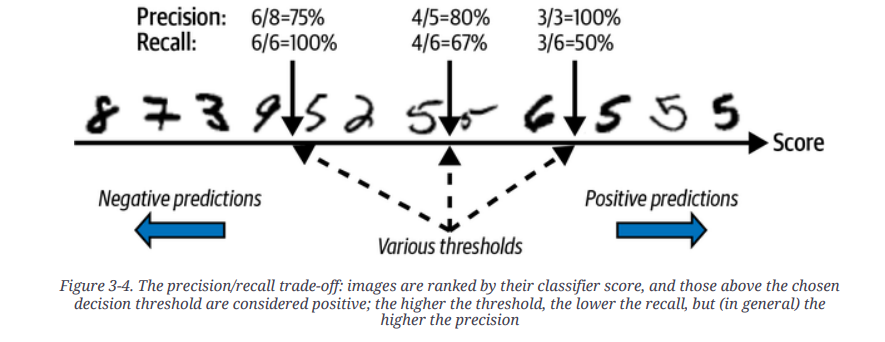

In [33]:
# we cannot set the threshold for the classifier, but we can get the scores for each instance and then set the threshold
# we can use the decision_function() method to get the scores for each instance

y_scores = sgd.decision_function([X_train[0]]) # 5 is the first instance
y_scores

threshold = 0
y_some_digit_pred = (y_scores > threshold) # it should be True
y_some_digit_pred

threshold = 200000
y_some_digit_pred = (y_scores > threshold) # it should be False
y_some_digit_pred

# how to decide the threshold? we can get the scores for all the instances and then decide the threshold

array([False])

In [34]:
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [35]:
y_scores.shape

(60000,)

In [36]:
y_scores[y_train_5].mean(), y_scores[~y_train_5].mean() # mean score for 5s and non 5s


(3344.312764449695, -20198.828171089554)

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 
precisions.shape, recalls.shape, thresholds.shape

((60001,), (60001,), (60000,))

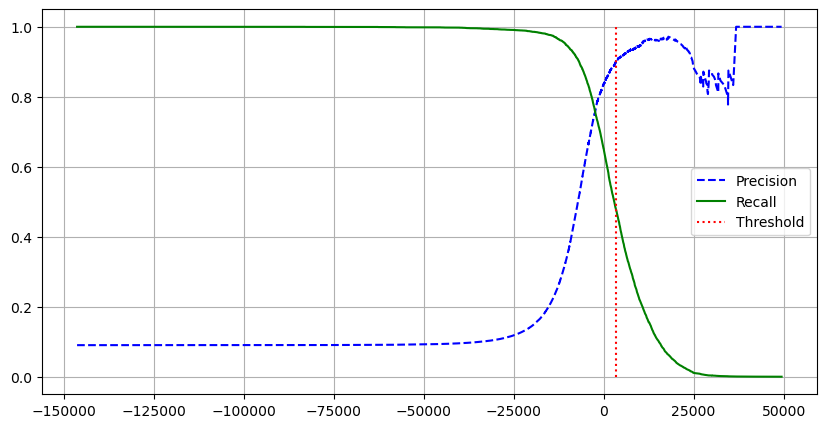

In [38]:
from matplotlib import pyplot as plt

threshold = 3370
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.vlines(threshold, 0, 1, colors='r', linestyles='dotted', label='Threshold')
plt.grid()
plt.legend()

# at this point, we can decide the threshold, if we want 90% precision and 50% recall, we can set the threshold to 3370

Text(0, 0.5, 'Precision')

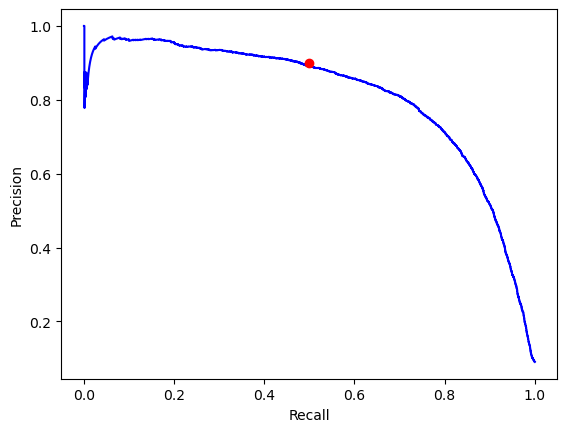

In [39]:
plt.plot(recalls, precisions, 'b-')
plt.plot([0.5], [0.9], 'ro')
plt.xlabel('Recall')
plt.ylabel('Precision')  

In [40]:
import numpy as np

np.argmax(np.array([False, True, False]))

1

In [41]:
# you can use the presision recall plot(previous) to decide the threshold
# But there is more easy way to do it

y_train_pred_90P_p = precisions > 0.9
y_train_90p = thresholds[y_train_pred_90P_p.argmax()] # get the first True value index from thresolds
y_train_90p

3370.0194991439557

In [42]:
y_scores # scores for all the instances
# instead of calling the predict method, we can use the scores to get the predictions

y_trained_pred_90 = y_scores > y_train_90p

precision_score(y_train_5, y_trained_pred_90), recall_score(y_train_5, y_trained_pred_90) # 0.9000345901072293, 0.4799852425751706

(0.9, 0.47980077476480354)

In [43]:
# great you have achieved 90% precision, but the recall is very low, 48% is not great at all
# If someone says, “Let’s reach 99% precision”, you should ask, “At what recall?”

## Roc Curve

- The receiver operating characteristic (ROC) curve is another common tool used
with binary classifiers. It is very similar to the precision/recall curve, but instead
of plotting precision versus recall, the ROC curve plots the true positive rate
(another name for recall) against the false positive rate (FPR). The FPR (also called
the fall-out) is the ratio of negative instances that are incorrectly classified as
positive. It is equal to 1 – the true negative rate (TNR), which is the ratio of
negative instances that are correctly classified as negative. The TNR is also called
specificity. Hence, the ROC curve plots sensitivity (recall) versus 1 – specificity

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [45]:
fpr.shape, tpr.shape, thresholds.shape

((3908,), (3908,), (3908,))

In [46]:
# fpr = 

In [47]:
y_train_90p

3370.0194991439557

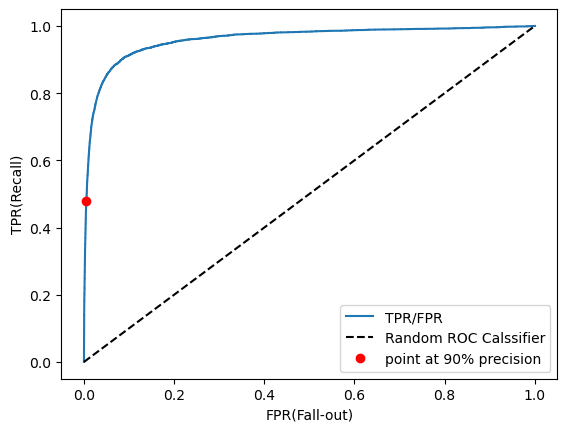

In [48]:
idx_of_threshold_at_90p = (thresholds <= y_train_90p).argmax() # since threshold are in decreasing order we use <= 

tpr_90, fpr_90 = tpr[idx_of_threshold_at_90p], fpr[idx_of_threshold_at_90p]

plt.plot(fpr, tpr, label='TPR/FPR')
plt.plot([0, 1], [0, 1], 'k--', label='Random ROC Calssifier')
plt.plot(fpr_90, tpr_90, 'ro', label='point at 90% precision')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')

plt.legend()

In [49]:
# A good classifier stays as far away from Random Line as possible (toward the top-left corner). 
# One way to compare classifiers is to measure the area under the curve (AUC). 
# A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

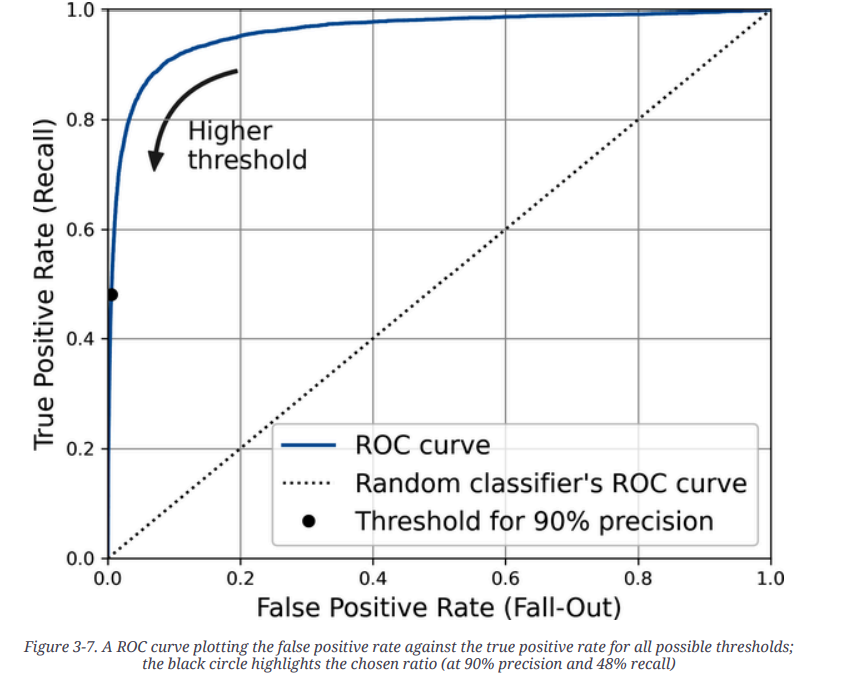

In [50]:
# Area under the curve roc auc score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores) # 0.9604938554008616

0.9604938554008616

## PR Curve(Precision-recall)
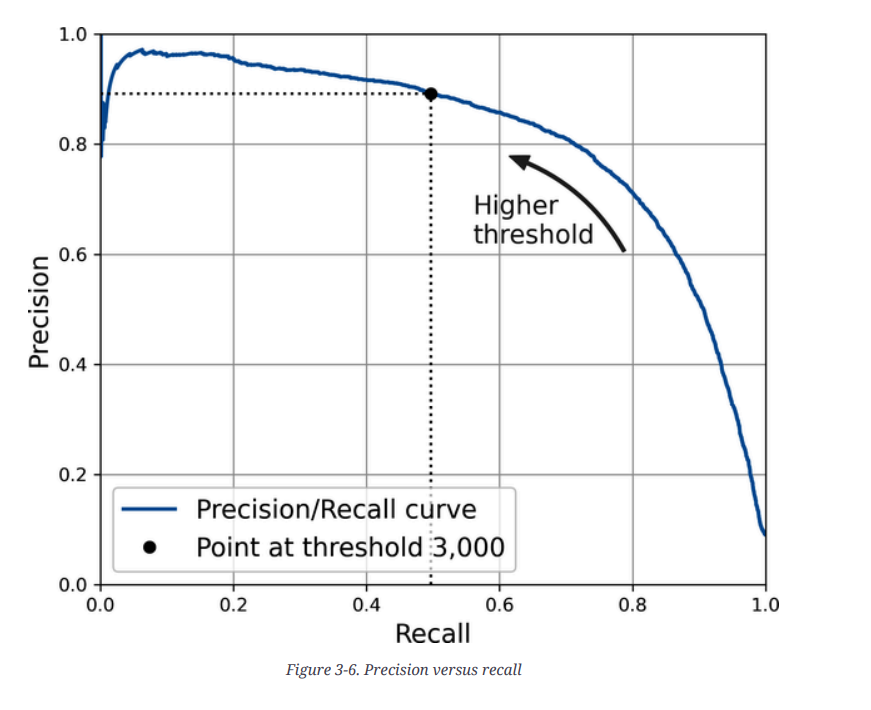

In [51]:
# Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use.
# As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.
# For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). 
# In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

In [52]:
# Lets create a RandomForest Classifier and compare with SGD Classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

In [53]:
y_prod_forest = cross_val_predict(forest, X_train, y_train_5, cv=3, method='predict_proba')
y_prod_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [54]:
y_prod_forest[:2] # first two instances, first column is the probability of the negative class, second column is the probability of the positive class
# first instance has 89% probability of being positive and 11% probability of being negative

array([[0.11, 0.89],
       [0.99, 0.01]])

In [55]:
# the second column contains the probability of the positive class, so we can use it as the score
y_prod_forest[:, 1]

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [56]:
y_scores_forest = y_prod_forest[:, 1] # probability of the positive class

precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

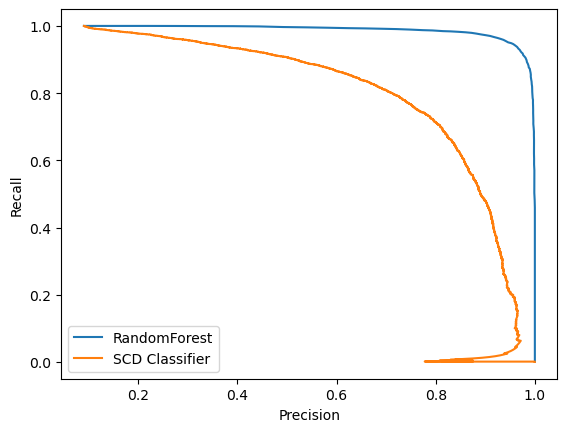

In [57]:
plt.plot(precision_forest, recall_forest, label='RandomForest') # RandomForest is better than SGD
plt.plot(precisions, recalls, label='SCD Classifier')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

# random forest has curve to the top right and has better roc auc score

In [58]:
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [59]:
precision_score(y_train_5, y_scores_forest > 0.5), recall_score(y_train_5, y_scores_forest > 0.5) # 0.9905083315756169, 0.8662608374838591
# threshold 0.5(because the range is from 0-1 probabilities) is used, and the precision is 99% and recall is 86%

(0.9905083315756169, 0.8662608374838591)

## Multiclass Classification

- Earlier we have seen binary classification, now lets dig into multiclass classification
- Some Scikit-Learn classifiers (e.g., LogisticRegression ,
RandomForestClassifier , and GaussianNB ) are capable of handling multiple
classes natively. Others are strictly binary classifiers (e.g., SGDClassifier and
SVC ). However, there are various strategies that you can use to perform
multiclass classification with multiple binary classifiers

## Ways to handel multiple classes

## One-vs-All (OvA) / One-vs-Rest (OvR) Strategy for Multi-Class Classification

The One-vs-All (OvA), or One-vs-Rest (OvR), strategy is another common approach to tackle multi-class classification problems using binary classifiers. In contrast to OvO, OvA trains a separate binary classifier for *each* class, treating it as the "positive" class and all other classes as the "negative" class.

**How it Works:**

1.  **Class-Specific Classifiers:**
    *   For *N* classes, you train *N* binary classifiers.
    *   Each classifier is trained to distinguish one specific class from *all the other classes*.
    *   For example, with 3 classes (A, B, C), you'd have classifiers: A vs. (B+C), B vs. (A+C), and C vs. (A+B)

2.  **Training Data Transformation:**
    *   **Each classifier is trained on the *entire* training dataset**, but the class labels are modified.
    *   For each classifier, the target variable will be 1 for the current class and 0 for all other classes.
        *   For instance, the classifier for class A will have a target variable of 1 for all samples of class A and 0 for all other samples (classes B, C).

3.  **Classification Phase:**
    *   To classify a new data point, you run it through *all* the binary classifiers.
    *   Each classifier outputs a score or probability that the instance belongs to its corresponding class.
    *   The class with the *highest score/probability* is the predicted class.

**Key Advantages:**

*   **Fewer Classifiers:** Compared to OvO, you only need to train *N* classifiers (where *N* is the number of classes).
*   **Simpler Implementation:** Conceptually, OvA is often easier to implement than OvO.
*   **Faster Inference:** Running data through fewer classifiers can lead to faster prediction times.
*   **Good for Imbalanced Datasets**: Since each model is only trained to distinguish the target class from all others it can handle class imbalance.

**Disadvantages:**

*   **Class Imbalance within Binary Problems:** Each binary classification task tends to be imbalanced, with a larger number of samples of other classes than of the target class.  This can impact the classifier's performance.
*   **Performance Can Be Lower**: Performance can be worse when compared to OvO, especially if there are overlapping class.
*  **More data is used per model:** Whereas with OvO each model only trains on a subset of the data.

**Example:**

If you have 3 classes (A, B, and C):

*   You'd train 3 classifiers: A vs. (B+C), B vs. (A+C), C vs. (A+B).
*   To train the A vs (B+C) classifier:
    *  All instances of class A in your dataset get the new label `1`.
    *  All instances of classes B or C in your dataset get the new label `0`.
*   You run the new instance through all 3 models.
*   The model that returns the highest score wins.

**When to Use OvA:**

*   When you have a moderate number of classes.
*   When simplicity and speed are important.
*   When the number of classes is high, making the number of classifiers in OvO very computationally expensive.
* When class imbalance is a concern.

**Summary:**

OvA trains a separate classifier for each class, which learns to distinguish that class from all other classes combined. While OvA can have drawbacks related to class imbalance within the binary classifiers, it is still widely used due to its simplicity and efficiency for multi-class problems.


## One-vs-One (OvO) Strategy for Multi-Class Classification

The One-vs-One (OvO) strategy is a method for handling multi-class classification problems by breaking them down into multiple binary classification tasks. Instead of training one classifier to distinguish between all classes, OvO trains a separate binary classifier for every possible pair of classes.

**How it Works:**

1.  **Pairwise Classifiers:**
    *   For *N* classes, you train *N*( *N* - 1) / 2 binary classifiers.
    *   Each classifier is responsible for distinguishing between a specific pair of classes.
    *   For example, with 3 classes (A, B, C), you'd have classifiers: A vs. B, A vs. C, and B vs. C.

2.  **Focused Training Data:**
    *   **Crucially, each binary classifier is trained only on the subset of the training data that contains its two target classes.**
    *   For instance, the "0 vs. 1" classifier is trained only on data points that are labeled as 0 or 1; other data is ignored by this specific classifier.
    *   This data reduction is one of the key advantages of OvO.

3.  **Classification Phase:**
    *   To classify a new data point, you run it through *all* of the binary classifiers.
    *   Each classifier "votes" for one of its two classes.
    *   The class that receives the most votes is the predicted class.

**Key Advantages:**

*   **Simpler Binary Problems:** Binary classification is often easier than multi-class classification.
*   **Focused Training:** Each classifier is trained specifically on the task of differentiating between only two classes, potentially leading to better performance in that particular task.
*   **Data Reduction:** Training on reduced datasets is faster and more efficient.
*   **Flexibility:** You can use any binary classification algorithm for each of the classifiers.
*  **Good Performance:** Often better than One-vs-all

**Disadvantages:**

*   **Large Number of Classifiers:** Requires training *N* (*N* - 1) / 2 classifiers, which can be computationally expensive for a large number of classes.
* **Computational Cost:** Training many models may not be scalable if there are a large number of classes.

**Example:**

If you have 4 classes (A, B, C, D):

*   You'd train 6 classifiers: A vs B, A vs C, A vs D, B vs C, B vs D, C vs D
*   For each binary classifier, you will only train on training instances that belong to those two classes.
*   During inference, you'll run the input instance through all six models. Each model will vote for one of its two classes.
*   The class with the most votes wins.

**When to Use OvO:**

*   When you have a moderate number of classes.
*   When you want to avoid a single, complex multi-class model.
*   When you want to use simple, efficient binary classifiers, such as SVM.
*   When you have sufficient computational resources.
* When One-vs-all is not working as well.

**Summary:**

OvO tackles multi-class classification by training a set of specialized binary classifiers, each trained only on a subset of the data corresponding to two specific classes. By simplifying the problem into many binary problems, OvO can achieve good performance. However, the number of models to train can become a bottleneck if the number of classes is large.

In [60]:
from sklearn.svm import SVC

svc_digit = SVC() # its uses one vs one strategy for multiclass classification

svc_digit.fit(X_train[:2000], y_train[:2000]) # sklearn automatically detects the binary classification and uses one vs one strategy because y_train is a multiclass classification

SVC()

In [61]:
svc_digit.predict([X_train[0]]) # it should be 5, thats correct

# it is using one vs one strategy, so it has 45 classifiers, and it has to run all the classifiers to get the prediction  

array(['5'], dtype=object)

In [62]:
svc_digit.decision_function([X_train[0]]) # it returns 10 scores, one for each class

# here class 5 has the highest score, so it is predicting 5

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [63]:
svc_digit.classes_ # classes

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [64]:
# if you want force the classifier to use one vs rest strategy, you can use OneVsRestClassifier or OneVsOneClassifier

from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(SVC())

ovr.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC())

In [65]:
ovr.predict([X_train[0]]) # it should be 5 

array(['5'], dtype='<U1')

In [66]:
ovr.estimators_ # 10 classifiers, one for each class

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [67]:
ovr.decision_function([X_train[0]]) # 10 scores, one for each class

array([[-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
         0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052]])

In [68]:
cross_val_score(ovr, X_train[:2000], y_train[:2000], cv=3, scoring='accuracy')

array([0.91454273, 0.88455772, 0.93693694])

In [69]:
## We can simply increase the accuracy by scaling the input features

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_transformed = scalar.fit_transform(X_train)

cross_val_score(ovr, X_train_transformed[:2000], y_train[:2000], cv=3, scoring='accuracy')

array([0.88005997, 0.83808096, 0.9009009 ])

## Error Analysis

- You’d explore data preparation
options, try out multiple models, shortlist the best ones, fine-tune their
hyperparameters using GridSearchCV , and automate as much as possible. Here,
we will assume that you have found a promising model and you want to find
ways to improve it. One way to do this is to analyze the types of errors it makes.

In [70]:
from sklearn.linear_model import SGDClassifier

scd_clg = SGDClassifier()

cross_val_score(scd_clg, X_train_transformed[:5000], y_train[:5000], cv=3, scoring='accuracy')

array([0.85302939, 0.89382124, 0.8907563 ])

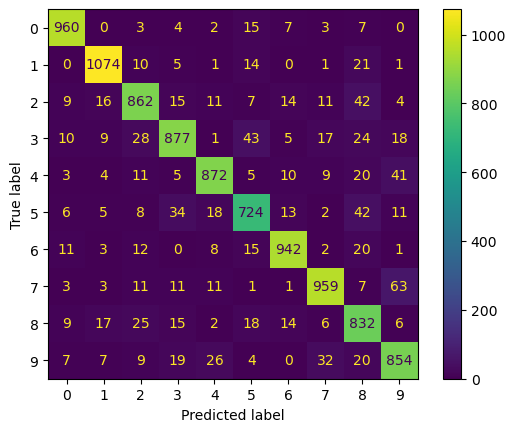

In [71]:
## Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(scd_clg, X_train_transformed[:10000], y_train[:10000], cv=3)

ConfusionMatrixDisplay.from_predictions(y_train[:10000], y_pred)

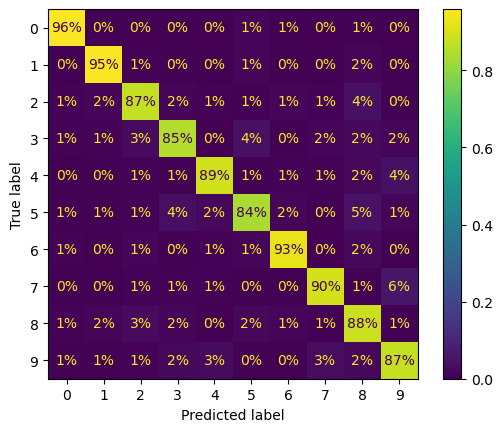

In [72]:
# As you can see that model has predicted the most of the images correctly(diagonal elements)

# now les normalize it by rows

ConfusionMatrixDisplay.from_predictions(y_train[:10000], y_pred, normalize='true', values_format='.0%') # out of all the true class what percentage of values model has predicted correctly

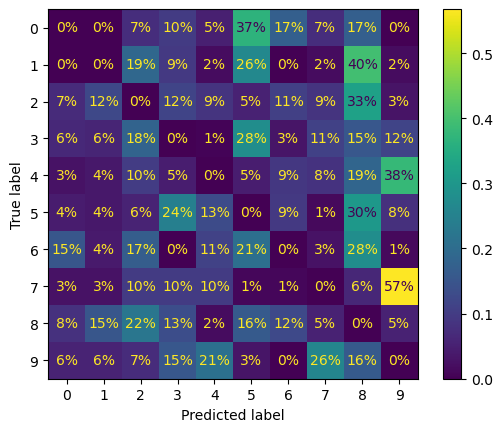

In [73]:
# Lets try to give importance to the errors

weights = (y_train[:10000] != y_pred)
ConfusionMatrixDisplay.from_predictions(y_train[:10000], y_pred[:10000], sample_weight=weights, normalize='true', values_format='.0%')

# the below graph tells you that out of all MissClassified Digits % of values are classfied as Some Digit
# # for ex. for value 7, out of all missclassified values 57% of values were 9 

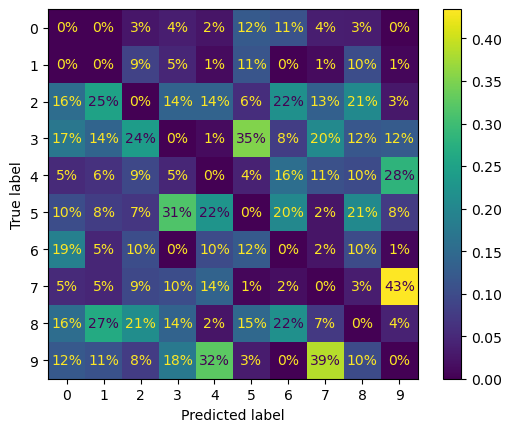

In [74]:
# we can also normalize pred(columns)

ConfusionMatrixDisplay.from_predictions(y_train[:10000], y_pred, sample_weight=weights, normalize='pred', values_format='.0%') # ~38%-40% of missclassification of 7's are actually 9

In [75]:
## Tips for Reducing the errors

# Analyzing the confusion matrix often gives you insights into ways to improve
# your classifier. Looking at these plots, it seems that your efforts should be spent
# on reducing the false 8s. For example, you could try to gather more training data
# for digits that look like 8s (but are not) so that the classifier can learn to
# distinguish them from real 8s. Or you could engineer new features that would
# help the classifier—for example, writing an algorithm to count the number of
# closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the
# images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such
# as closed loops, stand out more.

In [76]:
## Analyzing the indivisual errros is also a good way to get insight

# you can pick the 3's and 5's true and predicted values and construct a confusion matrix

# lets analyze the top right and bottom left block, as you might see for some digits its very difficult to clasify the images
# As a remainder we are using linear model its not good at making a complicated relationship's

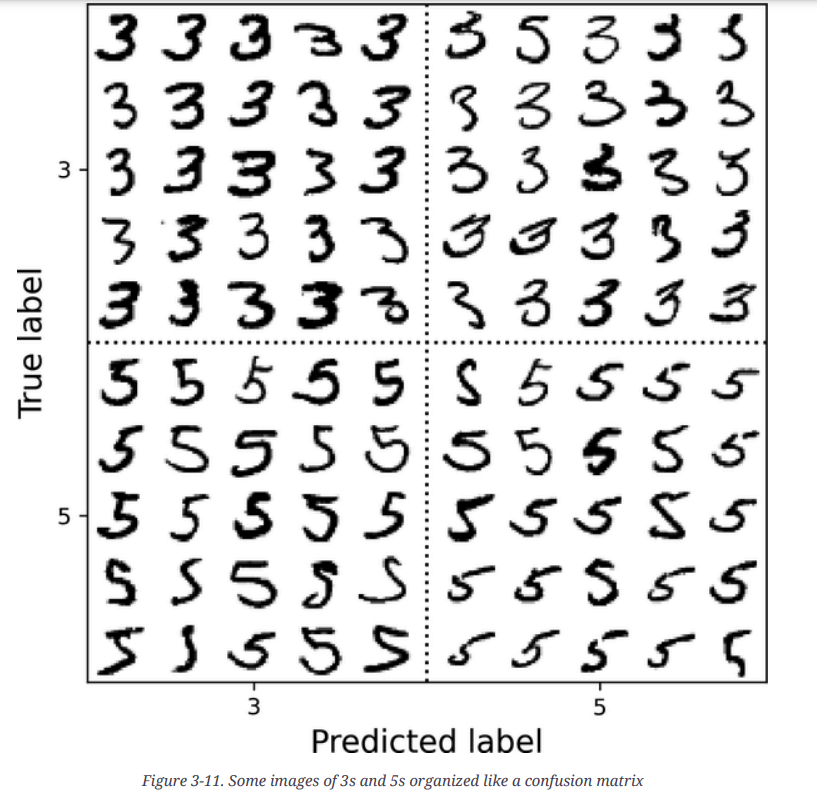

## Multilabel Classification

Until now, each instance has always been assigned to just **one class**. However, in some cases, you may want your classifier to output **multiple classes** for each instance.

**Example: Face Recognition**

Consider a face-recognition classifier. What should it do if it recognizes several people in the same picture? It should attach **one tag per person it recognizes**.

Let's say the classifier has been trained to recognize three faces: **Alice**, **Bob**, and **Charlie**.

Then, when the classifier is shown a picture of **Alice and Charlie**, it should output `[True, False, True]`. This output means:

*   **True:** "Alice yes" (Alice was recognized)
*   **False:** "Bob no" (Bob was not recognized)
*   **True:** "Charlie yes" (Charlie was recognized)

**Definition:**

Such a classification system that outputs multiple binary tags is called a **multilabel classification system**.

In [77]:
# create a simple multilabel classification
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train > '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

kn_clg = KNeighborsClassifier()

kn_clg.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [78]:
kn_clg.predict([X_train[0]]) # predicted correctly, Not Larger than 7 and is Odd number

array([[False,  True]])

In [79]:
## For measuring the performance we can use F1 score, the below calculates the F1 score across all the labels and takes the average

## This approach assumes that all labels are equally important, which may not be
# the case. In particular, if you have many more pictures of Alice than of Bob or
# Charlie, you may want to give more weight to the classifier’s score on pictures of
# Alice. One simple option is to give each label a weight equal to its support (i.e., the
# number of instances with that target label). To do this, simply set
# average="weighted" when calling the f1_score() function
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_pred = cross_val_predict(kn_clg, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_pred, average='macro')


0.9705516699095764

## Multi-Label Classification and the ChainClassifier

### The Challenge of Multi-Label Classification

In **multi-label classification**, each data instance can be assigned *multiple* categories or labels simultaneously, unlike multi-class classification where each instance belongs to only one class.

**Examples:**

*   A news article labeled with "Politics," "International," and "Economy."
*   An image of a digit tagged with "large" (7, 8, or 9) and "odd" or "even."

Standard classifiers, like SVC or Logistic Regression, are designed for single-label or multi-class problems and don't directly handle multiple labels per instance.

### The Issue with Independent Models

A naive approach is to train a separate binary classifier for each label. However, this has limitations:

*   **Loss of Dependencies:** Independent models fail to capture the dependencies or relationships that may exist between labels. For example: A digit labeled "large" is more likely to be "odd" but this dependence is unknown to each individual classifier.
*   **Suboptimal Performance:** Ignoring label dependencies can lead to lower classification accuracy.

### Introducing ChainClassifier: Capturing Label Dependencies

The `ChainClassifier` addresses these limitations by:

1.  **Chained Models:** Organizing classifiers in a chain, where the output of each classifier serves as an *additional* input feature for subsequent classifiers.
2.  **Sequential Information Flow:** Enabling information about predicted labels to be passed down the chain.
3.  **Label Order Importance:** The order of models in the chain matters, since earlier models' predictions are input to models later in the chain.
4.  **Dependency Learning:** Allowing later classifiers to utilize the predicted labels from previous classifiers to capture dependencies.

### ChainClassifier Training Strategies

1.  **Standard Training (No `cv` parameter):**
    *   Each model uses input features and the *actual* labels of the preceding models in the chain during training.
    *   This can result in sub-optimal performance due to a mismatch between the training labels and the predicted values.

2.  **Cross-Validation Training (Using the `cv` parameter):**
    *   Uses cross-validation to generate "clean" *out-of-sample predictions* for each model in the chain.
    *   Each model is trained on k-1 folds of the data and makes predictions for the held-out fold.
    *   These out-of-sample predictions are then used as input for the models later in the chain.

### Why Cross-Validation is Crucial

*   **Prevents Overfitting:** Cross-validation during training prevents each model from training with leaked values that are not out of sample.
*   **More Accurate Models:** Using out of sample predictions means that the models train on more realistic data.
*   **Improved Generalization:** Out-of-sample predictions improve model robustness and its ability to generalize to new data.

### How ChainClassifier Improves Multi-label Classification

*   **Captures Label Relationships:** By using predictions from earlier models as input, the chain can learn dependencies between labels.
*   **Better Performance:** Results in more accurate predictions compared to using independent models, especially when label dependencies exist.
*   **More Robust:** ChainClassifier trained using out-of-sample predictions via cross validation is less likely to overfit.

**In Summary:**

The `ChainClassifier` is a method for multi-label classification, that arranges models in a chain to capture label dependencies that are missed by independent models. It requires cross-validation during training to prevent overfitting and create robust models. This results in higher performance and better results.

In [80]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [81]:
chain_clf.predict([X_train[0]])


array([[0., 1.]])

## Multioutput Classification

### What is Multioutput Classification?

Multioutput classification is a generalization of multi-label classification. In multi-label classification, each instance can have multiple labels, but each label is binary (e.g., present/absent). In **multioutput classification**, each instance can also have multiple labels, but each label can have *more than two possible values* (i.e., it's multiclass).

*   **Multiple Outputs:** A multioutput classifier predicts multiple outputs simultaneously.
*   **Multiclass Labels:** Each output represents a multi-class label with more than two possible discrete values.
*   **Multi-dimensional Targets:** The target variable is a multi-dimensional variable where each dimension has a discrete value from a finite set.

### Multi-label vs. Multioutput: Key Differences

| Feature                 | Multi-label Classification                      | Multioutput Classification                                 |
| :---------------------- | :----------------------------------------------- | :---------------------------------------------------------- |
| **Label Type**          | Binary (e.g., present/absent, 0/1)              | Multiclass (more than two discrete values)                   |
| **Output Structure**   | Multiple binary labels                          | Multiple multi-class labels                                |
| **Label Relationship**  | Labels may have a dependency with each other    | Labels may or may not be dependent on each other         |

### Illustrative Example: Image Denoising

An example of a multioutput classification problem is building a system to remove noise from images:

1.  **Input:** A noisy digit image (represented as pixel intensities).
2.  **Output:** A clean digit image (also as pixel intensities).
3.  **Labels:** Each pixel in the image is treated as a separate output label.
4.  **Why Multioutput?**
    *   **Multi-label:**  Because multiple labels (pixels) are being predicted at the same time, this is a multi-label problem.
    *   **Multiclass:** Each pixel intensity (label) can have multiple discrete values (e.g., 0 to 255 in a grayscale image), and therefore each label is a multiclass problem. This makes the entire problem a multioutput problem.
    *   Each pixel is being classified to a discrete value.

### Code Example and `ClassifierChain`

The code uses a `ClassifierChain` to tackle multioutput classification:

*   `from sklearn.multioutput import ClassifierChain`
    *   Imports the `ClassifierChain` class.
*   `chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)`
    *   Creates a `ClassifierChain` using an SVC (Support Vector Classifier) as the base estimator and specifies 3-fold cross-validation (`cv=3`).
*   `chain_clf.fit(X_train[:2000], y_multilabel[:2000])`
    *   Trains the chain on the first 2000 instances in the dataset. `y_multilabel` acts as a multi-dimensional target.
*   `chain_clf.predict([some_digit])`
    *   Makes a prediction for a new data instance (`some_digit`). The output is a multi-dimensional vector representing the predicted labels.

### Classification vs. Regression: The Blurry Line

*   **Pixel Intensity Values:** Though pixel intensities are numbers, in this problem they are treated as discrete levels, which is why it is considered classification.
*   **Multioutput Flexibility:** Multioutput systems can be used for both classification and regression problems, as well as combinations of both.
*   **Discrete categories:** The key point is that in this case the pixel intensity is one of 256 discrete categories.

### Key Takeaways

*   **Multioutput classification** involves predicting multiple outputs simultaneously, where each output has more than two possible discrete values (multiclass).
*   **Image denoising** is a practical example where pixel intensities are treated as multi-class labels.
*   **`ClassifierChain`** can be used for multioutput by structuring models to make use of the dependency between labels, and can be trained using cross-validation to prevent overfitting.
*   The output from the model is an array, with each element being a prediction for a corresponding label.

This markdown summary should provide a clear understanding of multioutput classification and its application to image denoising.

In [82]:
np.random.seed(42) # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [83]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])


In [84]:
clean_digit.shape

(1, 784)

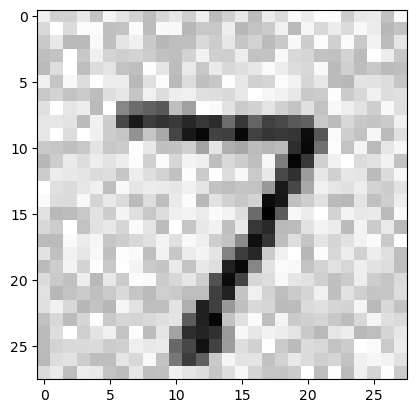

In [85]:
plt.imshow(X_test_mod[0].reshape(28, 28), cmap='binary') #noice dataset

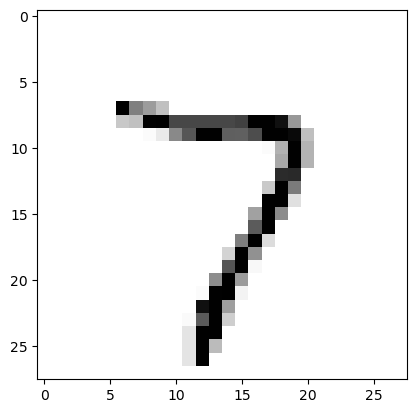

In [86]:
plt.imshow(clean_digit.reshape(28, 28), cmap='binary') # clear image